In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/GP ITI/Data 1.csv',parse_dates=True)
data2=pd.read_csv('/content/drive/MyDrive/GP ITI/Data 2.csv',parse_dates=True)
df = pd.concat([data1, data2])

#Descriptive Analytics 
###Data Exploration And Validation 

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
df.shape

(8738120, 9)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738120 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 666.7+ MB


### Data Type 
- `event_time`  object --> Datetime 
- `product-id` , `category_id` , `user_id`,  `brand` int64 --> object
- `category_code`,`event type` object --> category 



In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True).dt.tz_convert(None)

In [ ]:
df.event_type.value_counts()

view                3938296
cart                2544192
remove_from_cart    1687591
purchase             568041
Name: event_type, dtype: int64

In [ ]:
df.brand.value_counts()

runail       631089
irisk        430747
masura       382712
grattol      335617
bpw.style    244498
              ...  
shifei            4
vl-gel            3
gena              2
pueen             1
ibd               1
Name: brand, Length: 244, dtype: int64

In [ ]:
df.category_code.value_counts()

appliances.environment.vacuum             59761
stationery.cartrige                       26722
apparel.glove                             18232
furniture.living_room.cabinet             13439
accessories.bag                           11681
furniture.bathroom.bath                    9857
appliances.personal.hair_cutter            1643
accessories.cosmetic_bag                   1248
appliances.environment.air_conditioner      332
furniture.living_room.chair                 308
sport.diving                                  2
Name: category_code, dtype: int64

validate event time data in October and November 2019 
-  check month and year and hours

In [ ]:
month = df.event_time.dt.month
year = df.event_time.dt.year
hours = df.event_time.dt.hour
days = df.event_time.dt.day

In [ ]:
print(month.value_counts())
print(year.value_counts())
print(hours.value_counts())
print(days.value_counts())

11    4635837
10    4102283
Name: event_time, dtype: int64
2019    8738120
Name: event_time, dtype: int64
19    572431
18    549771
12    529573
11    525502
10    515224
20    503821
17    499300
13    491748
9     485081
8     464526
14    459411
16    458701
15    438576
7     419596
6     359101
21    338954
5     265921
22    197103
4     174239
3     121659
23    114945
2      89260
0      83596
1      80081
Name: event_time, dtype: int64
22    406444
7     371645
21    360594
28    357072
29    340923
24    337448
23    333515
6     329731
8     320580
2     314628
30    286996
27    273352
18    270774
14    266014
1     261528
17    259614
11    257123
5     256619
13    256420
20    254430
25    254124
4     254112
9     254059
10    254011
15    252945
3     250876
16    248875
19    244865
26    243854
12    241995
31    122954
Name: event_time, dtype: int64


check length of `product_id`,    `category_id`,    `user_id`

In [ ]:
convert= df['product_id'].astype(str)
print('Product id length')
print(convert.str.len().value_counts())
print('-----------')
convert= df['user_id'].astype(str)
print('user id length')
print(convert.str.len().value_counts())
print('-----------')
convert= df['category_id'].astype(str)
print('category id length')
print(convert.str.len().value_counts())

Product id length
7    8261287
4     296128
5     180705
Name: product_id, dtype: int64
-----------
user id length
9    8723092
8      14756
7        272
Name: user_id, dtype: int64
-----------
category id length
19    8738120
Name: category_id, dtype: int64


In [ ]:
df.product_id.nunique()

45960

In [ ]:
df.category_id.nunique()

500

In [ ]:
df.user_id.nunique()

713100

### Duplicates

In [ ]:
df.duplicated().sum()

459848

duplicates in each event 

In [ ]:
purchased = df[df['event_type'] == 'cart']
purchased.duplicated().sum()

50342

In [ ]:
purchased = df[df['event_type'] == 'view']
purchased.duplicated().sum()

253

In [ ]:
purchased = df[df['event_type'] == 'purchase']
purchased.duplicated().sum()

491

In [ ]:
purchased = df[df['event_type'] == 'remove_from_cart']
purchased.duplicated().sum()

408762

In [ ]:
#remove duplicates in view
# Create view_df DataFrame:
view_df = df[df['event_type'] == 'view']
# view_df.duplicated().sum()

# Drop duplicates:
view_df = view_df.drop_duplicates()

# Create not_view_df DataFrame:
not_view_df = df[df['event_type'] != 'view']

# Concate DataFrames:
df = pd.concat([view_df, not_view_df])

In [ ]:
#purchase duplicate summary 
df_purchase = df[df['event_type']=='purchase']
df_purchase_dup= df_purchase[df_purchase.duplicated(keep=False)]
purchase_dup_summary =df_purchase_dup.groupby(['user_id',df_purchase_dup['event_time'].dt.normalize(),'user_session','product_id']).agg(
                                                                                        quantity=('event_type','count')).reset_index()
purchase_dup_summary.describe()

,user_id,product_id,quantity
count,4.880000e+02,4.880000e+02,488.000000
mean,4.876804e+08,5.497594e+06,2.012295
std,9.520172e+07,1.217637e+06,0.156490
min,3.353539e+07,5.480000e+03,2.000000
25%,4.447345e+08,5.724499e+06,2.000000
50%,5.253931e+08,5.769902e+06,2.000000
75%,5.587537e+08,5.822573e+06,2.000000
max,5.781309e+08,5.896509e+06,4.000000


In [ ]:
# remove from cart duplicate summary
df_remove = df[df['event_type']=='remove_from_cart']
df_remove_dup= df_remove[df_remove.duplicated(keep=False)]
remove_dup_summary =df_remove_dup.groupby(['user_id',df_remove_dup['event_time'].dt.normalize(),'user_session','product_id']).agg(
                                                                                        quantity=('event_type','count')).reset_index()
remove_dup_summary.describe()

,user_id,product_id,quantity
count,3.841420e+05,3.841420e+05,384142.000000
mean,4.943927e+08,5.523877e+06,2.088332
std,7.716599e+07,1.212722e+06,1.038620
min,8.846226e+06,3.762000e+03,2.000000
25%,4.595603e+08,5.726164e+06,2.000000
50%,5.199352e+08,5.809911e+06,2.000000
75%,5.529087e+08,5.852513e+06,2.000000
max,5.799667e+08,5.909244e+06,182.000000


In [ ]:
# cart duplicate summary
df_cart = df[df['event_type']=='cart']
df_cart_dup= df_cart[df_cart.duplicated(keep=False)]
cart_dup_summary =df_cart_dup.groupby(['user_id',df_cart_dup['event_time'].dt.normalize(),'user_session','product_id']).agg( quantity=('event_type','count')).reset_index()
cart_dup_summary.describe()

,user_id,product_id,quantity
count,3.442900e+04,3.442900e+04,34429.000000
mean,5.255549e+08,5.445576e+06,2.699991
std,7.393137e+07,1.360876e+06,2.897148
min,1.028034e+07,3.762000e+03,2.000000
25%,5.288797e+08,5.700037e+06,2.000000
50%,5.572116e+08,5.807865e+06,2.000000
75%,5.580087e+08,5.848785e+06,2.000000
max,5.799504e+08,5.908242e+06,172.000000


###Nulls

In [ ]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    8594649
brand            3645191
price                  0
user_id                0
user_session        1450
dtype: int64

<Axes: >

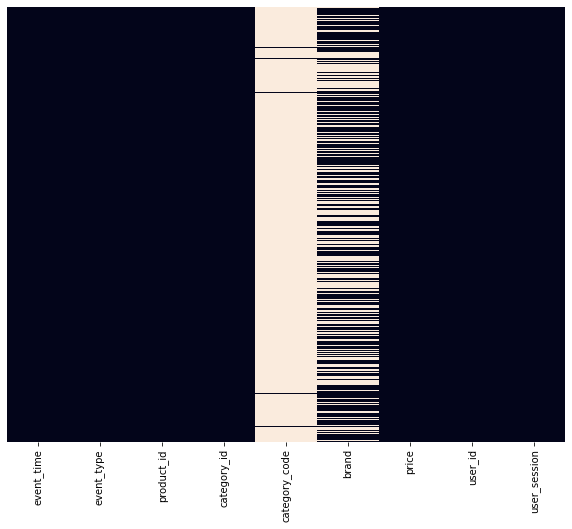

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False )

### Nulls in  category code

will check if the product have missing values in their category_code for instance but it exist for another instance

In [ ]:
# Group the data by product_id and category_code and count the number of null values for each group
null_counts = df.groupby(['product_id'])['category_code'].apply(lambda x: x.isnull().sum())

# Filter the groups with null count greater than 0 and less than the total count, and extract the product_ids
missing_category_products = null_counts[(null_counts > 0) & (null_counts < df.groupby('product_id')['category_code'].count())].index.tolist()
missing_category_products

[]

In [ ]:
# Group the data by product_id and category_code and count the number of null values for each group
null_counts = df.groupby(['category_id'])['category_code'].apply(lambda x: x.isnull().sum())

# Filter the groups with null count greater than 0 and less than the total count, and extract the product_ids
missing_category_products = null_counts[(null_counts > 0) & (null_counts < df.groupby('category_id')['category_code'].count())].index.tolist()
missing_category_products

[]

In [ ]:
# Filter the DataFrame to include only "purchase" events
purchases_df = df[df['event_type'] == 'purchase']
brand_counts = purchases_df.groupby('category_code').agg(count= ('user_id','count')).reset_index().sort_values(by='count',ascending=False)


<ipython-input-36-45a768d1260c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


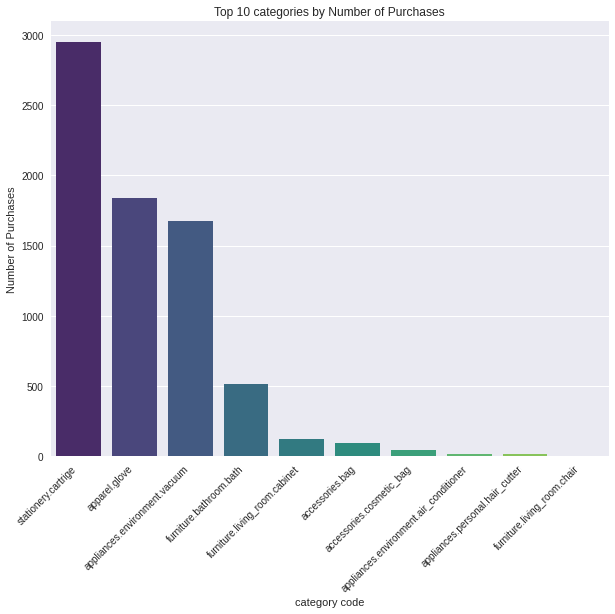

In [ ]:
# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('category_code').agg(count= ('user_id','count')).reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='count',ascending=False)
fig=plt.figure(figsize=(10,8))
plt.style.use('seaborn')
# Create a bar plot of the number of purchases for each brand using seaborn
sns.barplot(x='category_code', y='count', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('category code')
plt.ylabel('Number of Purchases')
plt.title('Top 10 categories by Number of Purchases')
plt.show()

In [ ]:
df_=df.copy()

In [ ]:
df_['brand']=df_['brand'].fillna('Unknown')

In [ ]:
df_['category_code']=df_['category_code'].fillna('Unknown')

<ipython-input-37-b28cb413ce90>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


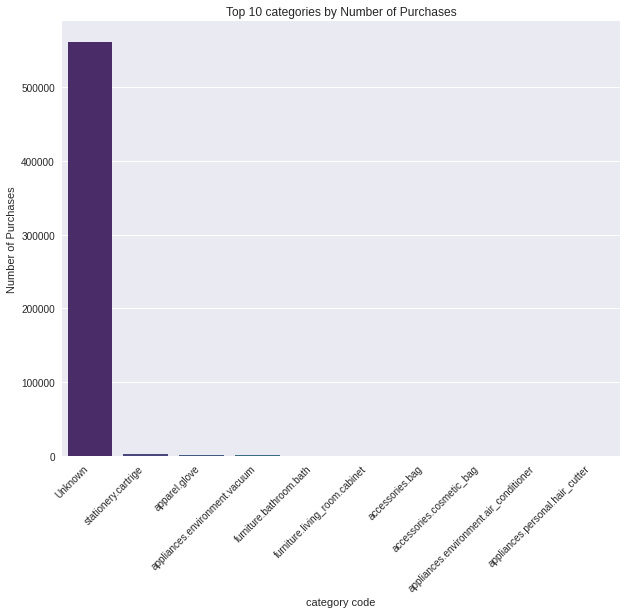

In [ ]:
# Filter the DataFrame to include only "purchase" events
purchases_df = df_[df_['event_type'] == 'purchase']
brand_counts = purchases_df.groupby('category_code').agg(count= ('user_id','count')).reset_index().sort_values(by='count',ascending=False)

# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('category_code').agg(count= ('user_id','count')).reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='count',ascending=False)
fig=plt.figure(figsize=(10,8))
plt.style.use('seaborn')
# Create a bar plot of the number of purchases for each brand using seaborn
sns.barplot(x='category_code', y='count', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('category code')
plt.ylabel('Number of Purchases')
plt.title('Top 10 categories by Number of Purchases')
plt.show()

### Nulls in Brand
will check if the product have missing values in their brand for instance but it exist for another instance

- first, check for each product id  unique brand

In [ ]:
nulls_before_fill=df.brand.isnull().sum()
nulls_before_fill

3645191

In [ ]:
grouped = df.groupby(["product_id"])["brand"].agg(["nunique", "unique"])
grouped[grouped['nunique']>1]

,nunique,unique
product_id,,


In [ ]:
grouped = df.groupby(["brand"])["product_id"].agg(["nunique", "unique"])
grouped[grouped['nunique']>1]

,nunique,unique
brand,,
airnails,226,"[5746051, 5697542, 5697545, 5662280, 5659922, ..."
almea,32,"[5859270, 5859299, 5859277, 5859278, 5859274, ..."
andrea,2,"[5525787, 5525802]"
ardell,54,"[5617817, 26766, 5808657, 37004, 26762, 580866..."
art-visage,65,"[5812120, 5776130, 5812128, 5891378, 5776131, ..."
...,...,...
ypsed,50,"[5840225, 5840243, 5840259, 5850665, 5840240, ..."
yu-r,7,"[5851891, 5851893, 5851892, 5851890, 5851894, ..."
zab,4,"[5830601, 5830603, 5830600, 5830602]"


the relation between product and brand one to many

In [ ]:
# Group the data by product_id and category_code and count the number of null values for each group
null_counts = df.groupby(['product_id'])['brand'].apply(lambda x: x.isnull().sum())

# Filter the groups with null count greater than 0 and less than the total count, and extract the product_ids
missing_products = null_counts[(null_counts > 0) & (null_counts < df.groupby('product_id')['brand'].count())].index.tolist()
print('the number of products that have  have missing values in their brand for instance but it exist for another instance:',len(missing_products))

the number of products that have  have missing values in their brand for instance but it exist for another instance: 1213


In [ ]:
#example of this case 
df[df['product_id']==5894639]['brand'].unique()

array([nan, 'pnb'], dtype=object)

In [ ]:
grouped = df.groupby('product_id')
df['brand'] = grouped['brand'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notnull().any() else x)


In [ ]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    8594649
brand            3636097
price                  0
user_id                0
user_session        1450
dtype: int64

In [ ]:
nulls_after_fill=df.brand.isnull().sum()
print('number of records after filling nans',nulls_before_fill-nulls_after_fill)

number of records after filling nans 9094


 after fill -> from 3645191 to  3636097

 about 9,094 of nans are filled

In [ ]:
#check if still nan or not 
df[df['product_id']==5894639]['brand'].unique()

array(['pnb'], dtype=object)

<ipython-input-44-d543195e159a>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


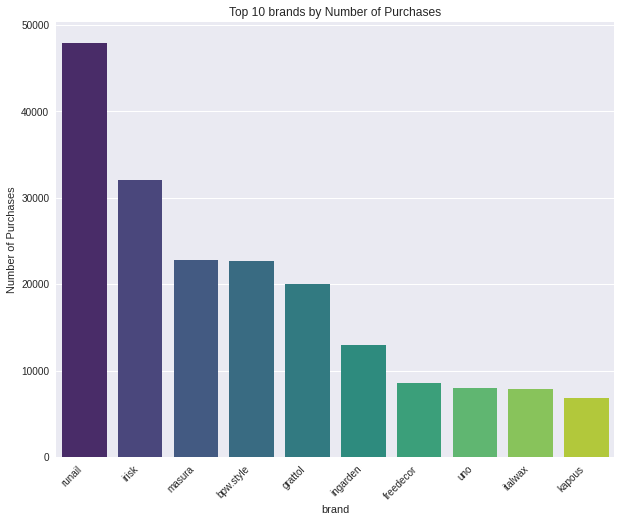

In [ ]:
# Filter the DataFrame to include only "purchase" events
purchases_df = df[df['event_type'] == 'purchase']
brand_counts = purchases_df.groupby('brand').agg(count= ('user_id','count')).reset_index().sort_values(by='count',ascending=False)

# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('brand').agg(count= ('user_id','count')).reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='count',ascending=False)
fig=plt.figure(figsize=(10,8))
plt.style.use('seaborn')
# Create a bar plot of the number of purchases for each brand using seaborn
sns.barplot(x='brand', y='count', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('brand')
plt.ylabel('Number of Purchases')
plt.title('Top 10 brands by Number of Purchases')
plt.show()

<ipython-input-45-83ea17d4afc3>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


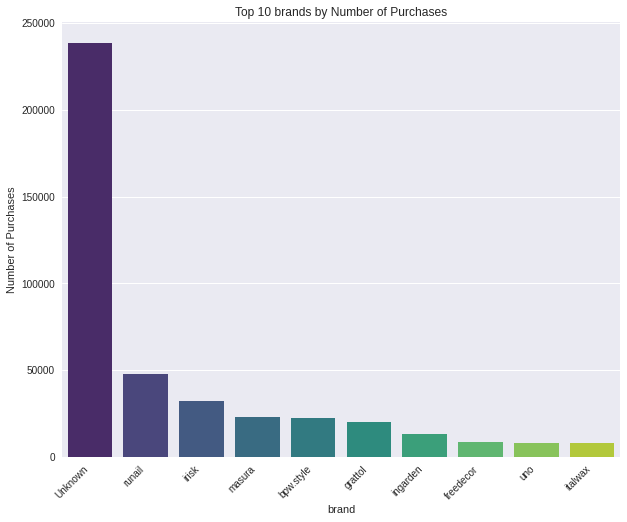

In [ ]:
# Filter the DataFrame to include only "purchase" events
purchases_df = df_[df_['event_type'] == 'purchase']
brand_counts = purchases_df.groupby('brand').agg(count= ('user_id','count')).reset_index().sort_values(by='count',ascending=False)

# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('brand').agg(count= ('user_id','count')).reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='count',ascending=False)
fig=plt.figure(figsize=(10,8))
plt.style.use('seaborn')
# Create a bar plot of the number of purchases for each brand using seaborn
sns.barplot(x='brand', y='count', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('brand')
plt.ylabel('Number of Purchases')
plt.title('Top 10 brands by Number of Purchases')
plt.show()

###Nulls in user_session

In [ ]:
null_in_session=df[df['user_session'].isnull()]

In [ ]:
null_in_session

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1888054,2019-10-14 12:48:17,view,5842668,1487580013841613016,NaN,NaN,14.51,560013350,NaN
2769478,2019-10-21 13:30:56,view,5790689,1487580009445982239,NaN,nitrimax,3.97,562627905,NaN
3296581,2019-10-25 13:25:42,view,5651938,1487580012902088873,NaN,NaN,6.33,564062402,NaN
715819,2019-11-06 12:58:49,view,5646693,1487580007986365405,NaN,NaN,16.51,568185424,NaN
1031023,2019-11-08 09:30:48,view,5770385,1487580013069861041,NaN,italwax,18.25,568890497,NaN
...,...,...,...,...,...,...,...,...,...
4601243,2019-11-30 19:03:25,remove_from_cart,5754302,1487580009286598681,NaN,lianail,1.78,391748818,NaN
4601283,2019-11-30 19:03:36,remove_from_cart,5760335,1487580009261432856,NaN,zinger,1.90,391748818,NaN
4601318,2019-11-30 19:03:44,remove_from_cart,5694465,1487580008112194531,NaN,NaN,4.68,391748818,NaN
4601352,2019-11-30 19:03:56,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN


In [ ]:
df[df['user_id']==391748818]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4600871,2019-11-30 19:02:02,view,5809910,1602943681873052386,NaN,grattol,4.97,391748818,b3eed56e-1ba1-4a9c-8ac9-2f6d3c3aa5a1
4601042,2019-11-30 19:02:42,remove_from_cart,5817702,1487580009496313889,NaN,NaN,0.60,391748818,NaN
4601173,2019-11-30 19:03:08,remove_from_cart,5873660,1487580009445982239,NaN,NaN,4.37,391748818,NaN
4601205,2019-11-30 19:03:10,remove_from_cart,5752069,1487580007306888126,NaN,irisk,2.43,391748818,NaN
4601228,2019-11-30 19:03:18,remove_from_cart,5586026,1487580009362096156,NaN,NaN,1.35,391748818,NaN
4601243,2019-11-30 19:03:25,remove_from_cart,5754302,1487580009286598681,NaN,lianail,1.78,391748818,NaN
4601283,2019-11-30 19:03:36,remove_from_cart,5760335,1487580009261432856,NaN,zinger,1.90,391748818,NaN
4601318,2019-11-30 19:03:44,remove_from_cart,5694465,1487580008112194531,NaN,NaN,4.68,391748818,NaN
4601352,2019-11-30 19:03:56,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN
4601353,2019-11-30 19:03:56,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN


In [ ]:
df[df['user_id']==560013350]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1840351,2019-10-14 06:15:08,view,5842668,1487580013841613016,NaN,NaN,14.51,560013350,9b0d76be-2715-45e3-ba1d-1b0e529b26f6
1888054,2019-10-14 12:48:17,view,5842668,1487580013841613016,NaN,NaN,14.51,560013350,NaN
1896058,2019-10-14 13:44:32,view,5842668,1487580013841613016,NaN,NaN,14.51,560013350,08eb5865-58c4-4e36-b010-5060f1acad86


In [ ]:
null_in_session['event_type'].value_counts()

cart                1170
remove_from_cart     268
view                  12
Name: event_type, dtype: int64

In [ ]:
null_in_session['event_time'].value_counts()

2019-11-23 16:52:55    5
2019-10-22 07:31:51    4
2019-10-30 23:06:48    4
2019-10-20 15:57:32    4
2019-10-22 07:31:53    3
                      ..
2019-10-27 16:42:04    1
2019-10-27 15:24:17    1
2019-10-27 15:24:16    1
2019-10-27 15:24:15    1
2019-11-04 09:03:19    1
Name: event_time, Length: 1303, dtype: int64

###Outliers 

In [ ]:
df['price'].describe().apply("{0:.2f}".format)

count    8737867.00
mean           8.31
std           18.95
min          -79.37
25%            2.05
50%            3.97
75%            6.78
max          327.78
Name: price, dtype: object

<ipython-input-7-6139099bac02>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-7-6139099bac02>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color ='#262223')


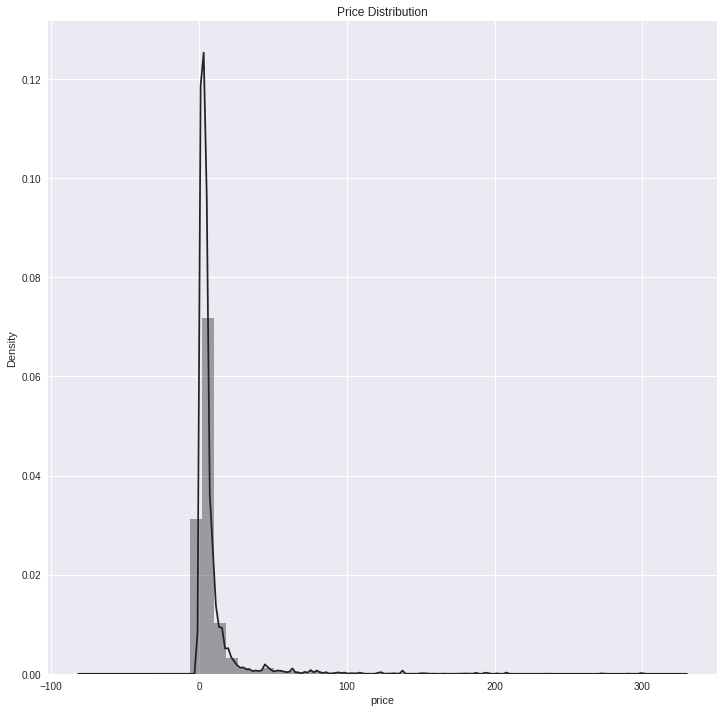

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
sns.distplot(df['price'],color ='#262223')
plt.title('Price Distribution')
plt.show()

<ipython-input-8-a9e12717c698>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


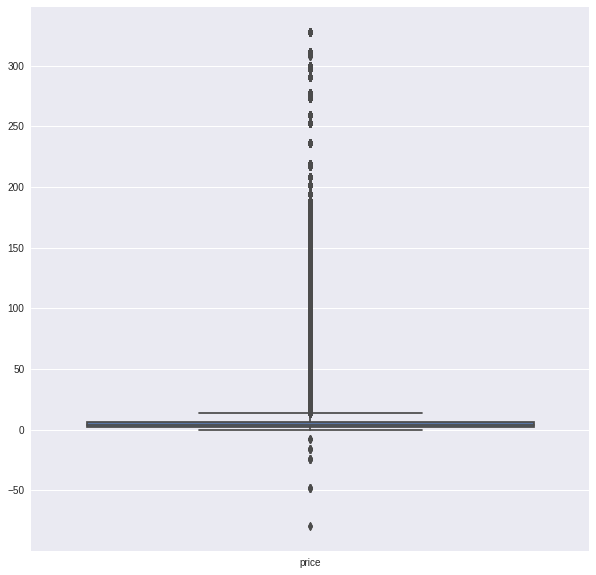

In [ ]:
plt.style.use('seaborn')
sns.boxplot(data=df[['price']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [ ]:
df[df['price']<0]['event_type'].value_counts()

purchase    37
Name: event_type, dtype: int64

In [ ]:
df[df['price']==0]['event_type'].value_counts()

view                13765
cart                 3068
remove_from_cart      857
Name: event_type, dtype: int64

In [ ]:
# top 16 products of prices in df 
df_highest_prices = df[df['price'] > 200]

In [ ]:
pivot = df_highest_prices.pivot_table(index=df_highest_prices['event_time'].dt.normalize(), columns='product_id', values='price')

Text(0.5, 1.0, 'Top 16 Highest Products')

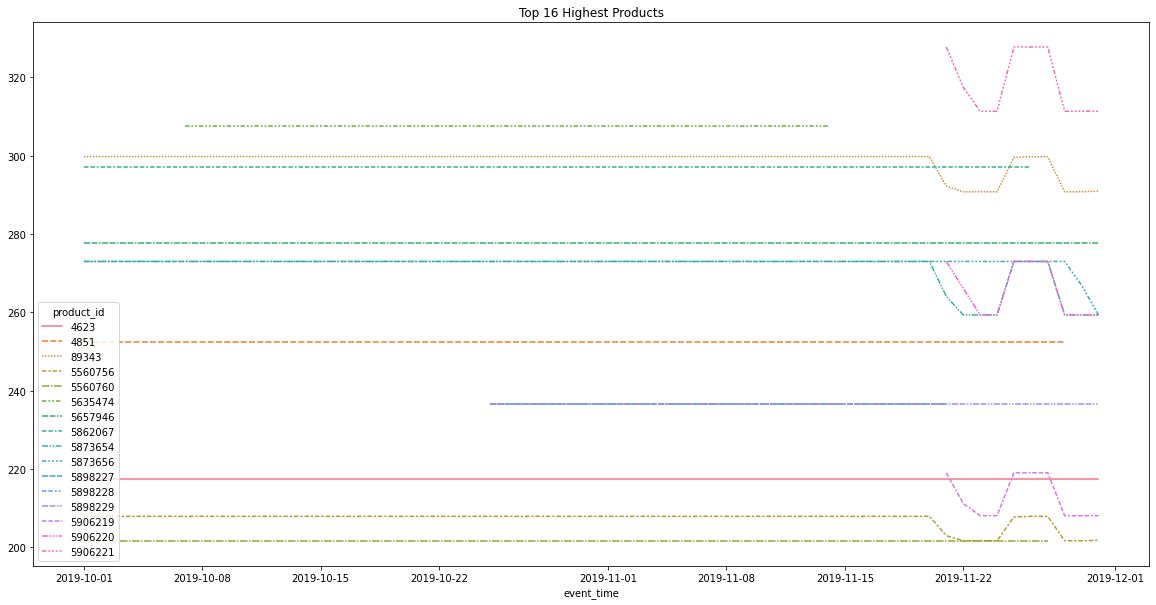

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=pivot)
plt.title("Top 16 Highest Products")

In [ ]:
df.to_csv('/content/drive/MyDrive/GP ITI/GP_cleaned.csv', index=False)